In [10]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

In [11]:
img = cv.imread('cat.jpg')

if img is None:
        sys.exti('파일을 못찾았음')

In [ ]:
#그림 rgb별 분류
cv.imshow('original_RGB',img)
cv.imshow('Upper left half',img[0:img.shape[0]//2,0:img.shape[1]//2,:])
cv.imshow('Center half',img[img.shape[0]//4:3*img.shape[0]//4,img.shape[1]//4:3*img.shape[1]//4,:])

cv.imshow('R channel',img[:,:,2])
cv.imshow('G channel',img[:,:,1])
cv.imshow('B channel',img[:,:,0])

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
h=cv.calcHist([img],[2],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1)

In [ ]:
t,bin_img = cv.threshold(img[:,:,2],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print('오츄 알고리즘이 찾은 최적 임곗값=',t)

cv.imshow('R chanenel',img[:,:,2])
cv.imshow('R channel binarization',bin_img)

cv.waitKey()
cv.destroyAllWindows()

In [12]:
gamma_img = cv.resize(img,dsize=(0,0),fx=0.25, fy=0.25) #이미지 크기 조정

In [13]:
def gamma(f, gamma=1.0):
    f1= f/255.0  # 픽셀값을 0~1 사이로 정규화
    return np.uint8(255*(f1**gamma))  # 감마 값을 적용하고 다시 0~255로 변환

In [ ]:
gc=np.hstack((gamma(gamma_img,0.5),
              gamma(gamma_img,0.75),
              gamma(gamma_img,1.0),
              gamma(gamma_img,2.0),
              gamma(gamma_img,3.0)))
cv.imshow('gamma',gc)
cv.waitKey()
cv.destroyAllWindows()

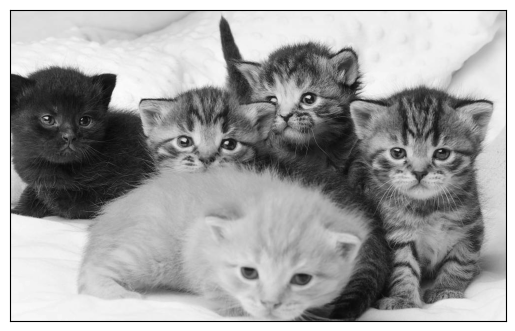

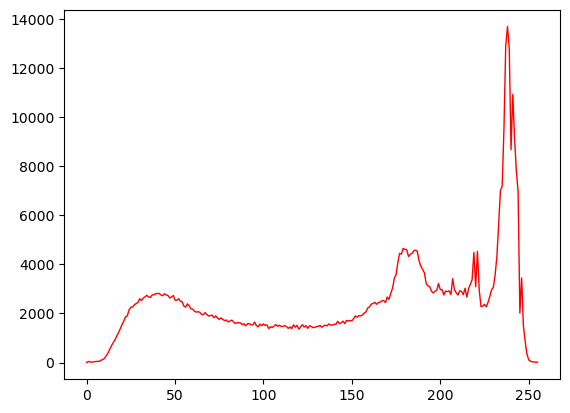

([<matplotlib.lines.Line2D at 0x17def264e30>], None)

In [17]:
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([gray],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1), plt.show()

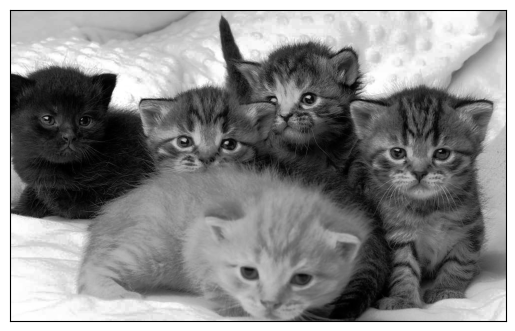

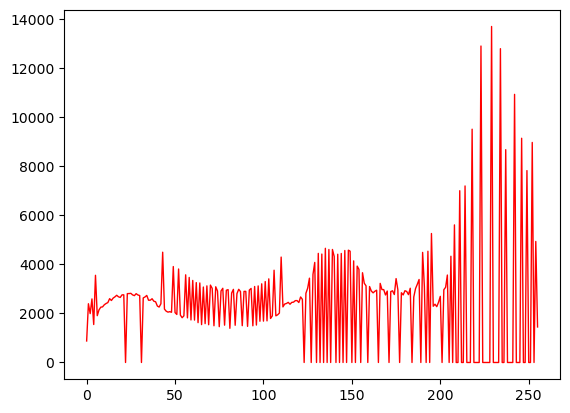

([<matplotlib.lines.Line2D at 0x17def2a00e0>], None)

In [18]:
equal=cv.equalizeHist(gray)
plt.imshow(equal,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([equal],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1), plt.show()